# Pretest analysis

Selection of mooney set

In [2]:
import glob, os #to work with paths
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # roughly ~base R plotting functionality
import pandas as pd #roughly ~base R & tidyr functionality 
import seaborn as sns #roughly ~ggplot2 functionality
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

#to make the plots appear inline, and saved in notebook:
%matplotlib inline
sns.set_context("talk") # seaborn function to make plots according to purpose (talk, paper, poster, notebook)

# We'll show people what version we use
import sys
print('Matplotlib Version: ' + mpl.__version__)
print('NumPy Version: ' + np.version.full_version)
print('Pandas Version:', pd.__version__)
print('Python Version: ' + sys.version)

import datetime
now  = datetime.datetime.now().isoformat()
print('Ran on ' + now)

Matplotlib Version: 3.1.1
NumPy Version: 1.17.0
Pandas Version: 0.25.0
Python Version: 3.7.3 (default, Oct  7 2019, 12:56:13) 
[GCC 8.3.0]
Ran on 2020-01-21T21:22:44.326621


In [4]:
!ls data/ #we can use shell commands to see where the data is (ls=dir on windows)

JW2.csv  JW.csv  NVH.csv


In [49]:

dffull = pd.DataFrame()

all_files = glob.glob(os.path.join('data/', "*.csv")) # get list of individual data files

for f in all_files:
    print(f)
    df = pd.read_csv(f, index_col=0)
    df = df[df.test_part.isin(['recognized', 'aha'])]
    df = df[['subject','currentStim','recognized','aha']]
    df = df.replace(np.NaN,'')
    df['aha'] = df['aha'].apply(str)
    df = df.groupby('currentStim',as_index=False).agg(''.join)
    df['recognized'] = np.where(df.recognized == "y", 1, 0)
    df['aha'] = pd.to_numeric(df['aha'])
    dffull = pd.concat([dffull,df], ignore_index=True)

print('Variables:\n', dffull.columns)
print('variables:\n', dffull.dtypes)
print('nb of participants:', len(dffull['subject'].unique()))
print(len(dffull))
# Save full data
dffull.to_csv('dffull.csv')
df= dffull

data/JW.csv
data/NVH.csv
data/JW2.csv
Variables:
 Index(['currentStim', 'subject', 'recognized', 'aha'], dtype='object')
variables:
 currentStim     object
subject         object
recognized       int64
aha            float64
dtype: object
nb of participants: 2
1133


In [50]:
df.head(20)

,currentStim,subject,recognized,aha
0,../img/tt/001tt.jpg,JWJW,1,5.0
1,../img/tt/007tt.jpg,JWJW,0,6.0
2,../img/tt/008tt.jpg,JWJW,1,5.0
3,../img/tt/009tt.jpg,JWJW,0,5.0
4,../img/tt/010tt.jpg,JWJW,0,5.0
5,../img/tt/013tt.jpg,JWJW,0,6.0
6,../img/tt/014tt.jpg,JWJW,0,4.0
7,../img/tt/018tt.jpg,JWJW,1,3.0
8,../img/tt/019tt.jpg,JWJW,1,5.0
9,../img/tt/020tt.jpg,JWJW,0,4.0


In [51]:
df.recognized.mean()

0.5948808473080318

In [52]:
df.aha.mean()

3.784642541924095

In [53]:
df.isnull().sum()

currentStim    0
subject        0
recognized     0
aha            0
dtype: int64

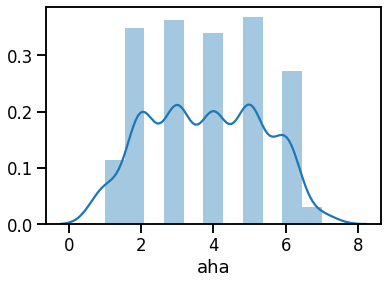

In [54]:
sns.distplot(df.aha)

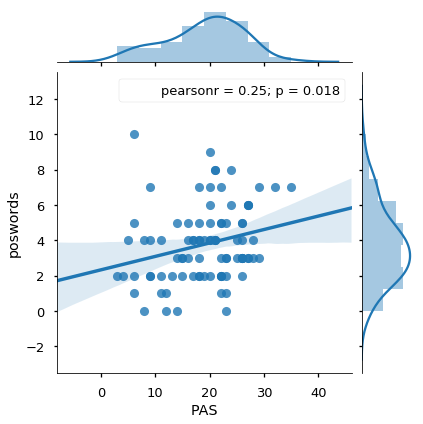

In [5]:
sns.jointplot(x="PAS", y="poswords", data=dffull, kind="reg");


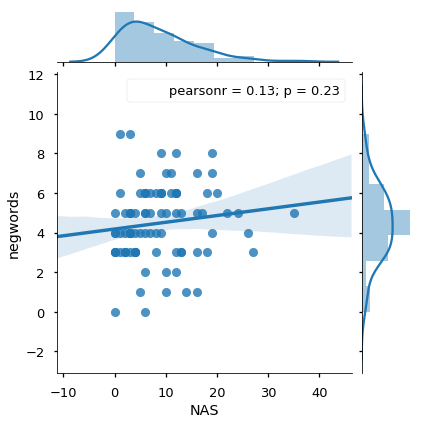

In [119]:
sns.jointplot(x="NAS", y="negwords", data=dffull, kind="reg");


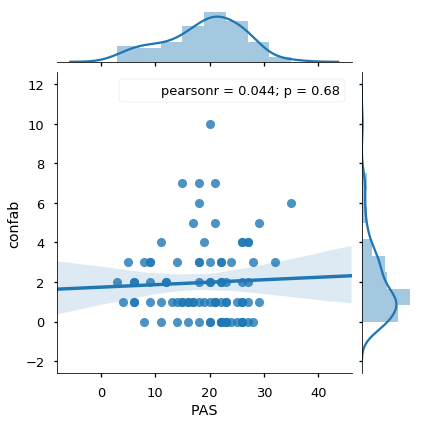

In [9]:
sns.jointplot(x="PAS", y="confab", data=dffull, kind="reg");


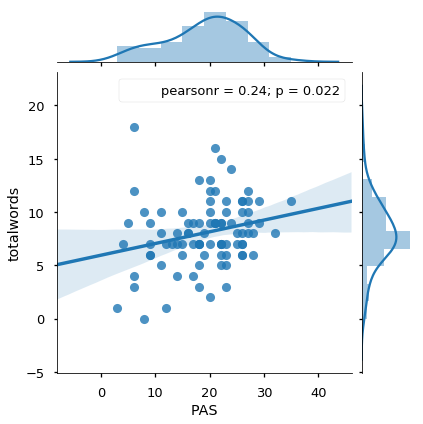

In [8]:
sns.jointplot(x="PAS", y="totalwords", data=dffull, kind="reg");


In [111]:
dffull.groupby(['condition']).totalwords.describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
0,45.0,8.022222,3.115131,1.0,7.0,8.0,9.0,16.0
180,44.0,8.045455,3.241838,0.0,6.0,8.0,10.0,18.0


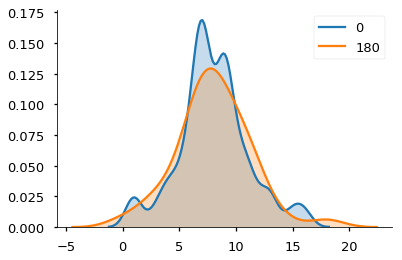

In [110]:
fig, ax = plt.subplots()
conditions = [0,180]

for condition in conditions:
   sns.kdeplot(dffull[dffull['condition'] == condition]['totalwords'], shade=True, label=str(condition))
        
sns.despine()

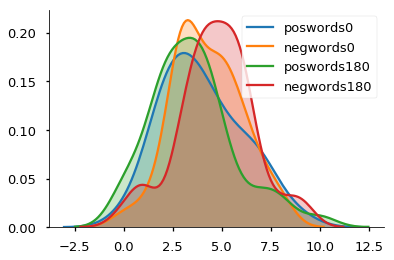

In [99]:
fig, ax = plt.subplots()
valences = ['poswords', 'negwords']
conditions = [0,180]

for condition in conditions:
    for val in valences: 
        sns.kdeplot(dffull[dffull['condition'] == condition][val], shade=True, label=val+str(condition))
        
sns.despine()

In [106]:
dffull['moodscore']= dffull.poswords - dffull.negwords

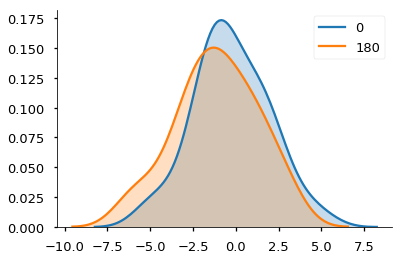

In [107]:
fig, ax = plt.subplots()
conditions = [0,180]

for condition in conditions:
   sns.kdeplot(dffull[dffull['condition'] == condition]['moodscore'], shade=True, label=str(condition))
        
sns.despine()

In [112]:
dffull.groupby(['condition']).confab.describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
0,45.0,2.111111,1.979695,0.0,1.0,2.0,3.0,10.0
180,44.0,1.840909,1.975939,0.0,0.0,1.0,3.0,7.0


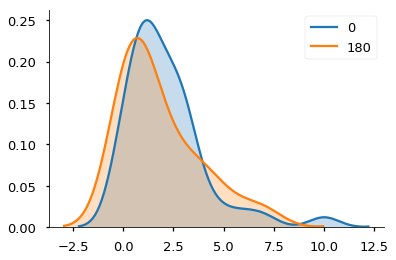

In [113]:
fig, ax = plt.subplots()
conditions = [0,180]

for condition in conditions:
   sns.kdeplot(dffull[dffull['condition'] == condition]['confab'], shade=True, label=str(condition))
        
sns.despine()

In [114]:
out = ttest_ind(dffull[dffull.condition==0]['confab'], dffull[dffull.condition==180]['confab'], alternative='larger')
print "t-test for difference between conditions:\nt = ", round(out[0],2), "p = ", round(out[1],4)

t-test for difference between conditions:
t =  0.64 p =  0.2605


In [88]:
dffull.groupby(['condition']).poswords.describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
0,45.0,4.000000,2.056033,0.0,2.0,4.0,5.00,9.0
180,44.0,3.545455,2.182963,0.0,2.0,3.0,4.25,10.0


In [89]:
dffull.groupby(['condition']).negwords.describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
0,45.0,4.266667,1.776104,0.0,3.0,4.0,5.0,8.0
180,44.0,4.681818,1.938265,0.0,4.0,5.0,6.0,9.0


In [109]:
dffull.groupby(['condition']).moodscore.describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
0,45.0,-0.266667,2.178406,-5.0,-2.0,-1.0,1.0,5.0
180,44.0,-1.136364,2.378107,-6.0,-3.0,-1.0,1.0,3.0


In [97]:
from statsmodels.stats.weightstats import ttest_ind

out = ttest_ind(dffull[dffull.condition==0]['negwords'], dffull[dffull.condition==180]['negwords'], alternative='smaller')
print "t-test for difference between conditions:\nt = ", round(out[0],2), "p = ", round(out[1],4)

t-test for difference between conditions:
t =  -1.05 p =  0.1474


In [108]:
out = ttest_ind(dffull[dffull.condition==0]['moodscore'], dffull[dffull.condition==180]['moodscore'], alternative='larger')
print "t-test for difference between conditions:\nt = ", round(out[0],2), "p = ", round(out[1],4)

t-test for difference between conditions:
t =  1.8 p =  0.0377
